In [ ]:
# standard libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Model evaluation libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# Model fitting libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')#you can also upload files using files.upload() function

Mounted at /content/drive


In [ ]:
hd = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heart disease.csv")
hd.head(12)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [ ]:
hd.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [ ]:
hd["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

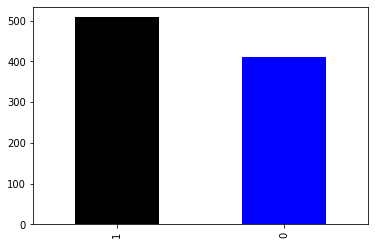

In [ ]:
hd["HeartDisease"].value_counts().plot(kind="bar",color = ["black","blue"]);

In [ ]:
hd.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
hd.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
hd.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


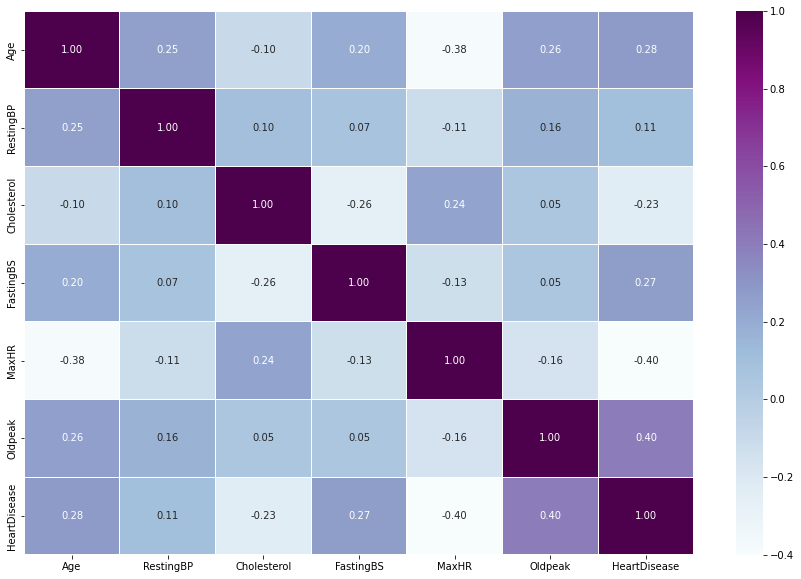

In [ ]:
corr_matrix = hd.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(corr_matrix,annot=True,linewidths=0.2,fmt = ".2f",cmap="BuPu")

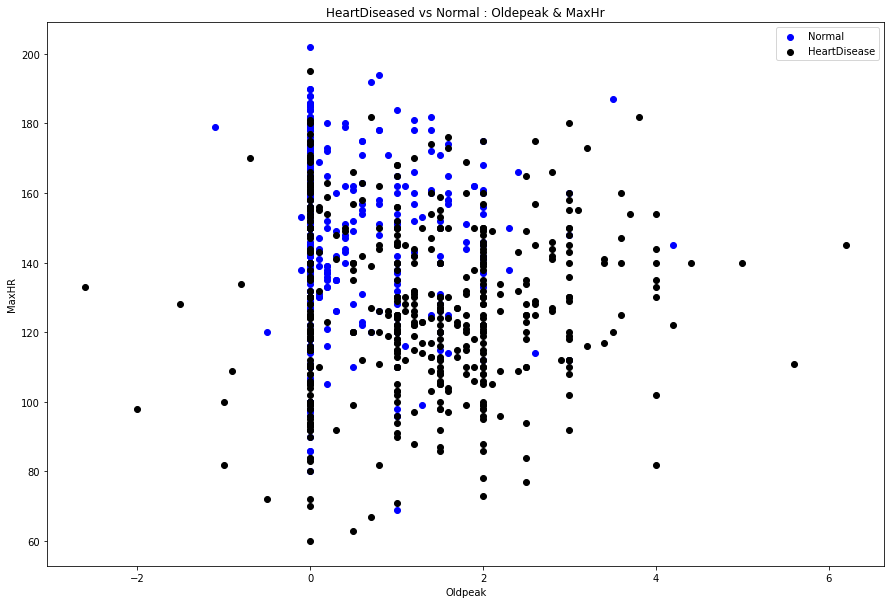

In [ ]:
plt.figure(figsize=(15,10))

# Normal
plt.scatter(hd.Oldpeak[hd["HeartDisease"]==0],hd.MaxHR[hd["HeartDisease"]==0],c="blue")

# HeartDisease
plt.scatter(hd.Oldpeak[hd["HeartDisease"]==1],hd.MaxHR[hd["HeartDisease"]==1],c="black")

plt.title("HeartDiseased vs Normal : Oldepeak & MaxHr")
plt.xlabel("Oldpeak")
plt.ylabel("MaxHR")
plt.legend(["Normal","HeartDisease"]);

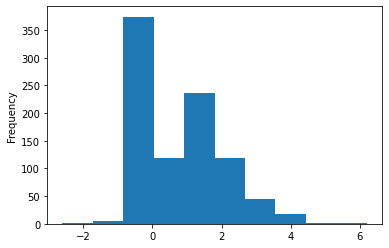

In [ ]:
hd.Oldpeak.plot.hist();

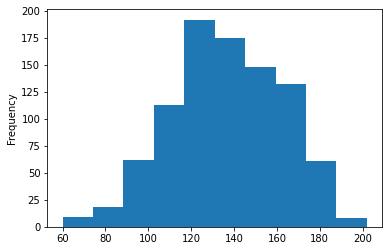

In [ ]:
hd.MaxHR.plot.hist();

In [ ]:
hd.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [ ]:
hd["Sex"].value_counts()

M    725
F    193
Name: Sex, dtype: int64

In [ ]:
hd["ChestPainType"].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [ ]:
hd["RestingECG"].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [ ]:
hd["ExerciseAngina"].value_counts()

N    547
Y    371
Name: ExerciseAngina, dtype: int64

In [ ]:
hd["ST_Slope"].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [ ]:
Replac = {'Sex':{'M':1,'F':0},
           'ChestPainType':{'ASY':1,'NAP':2,'ATA':3,'TA':4},
           'RestingECG':{'Normal':1,'LVH':2,'ST':3},
           'ExerciseAngina':{'N':0,'Y':1},
           'ST_Slope':{'Flat':0,'Up':1,'Down':2}}
hd.replace(Replac,inplace=True)

In [ ]:
hd.dtypes

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object

In [ ]:
x = hd.drop("HeartDisease",axis=1)
y = hd["HeartDisease"]

In [ ]:
np.random.seed(42)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
x_train

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
795,42,1,2,120,240,1,1,194,0,0.8,2
25,36,1,2,130,209,0,1,178,0,0.0,1
84,56,1,1,150,213,1,1,125,1,1.0,0
10,37,0,2,130,211,0,1,142,0,0.0,1
344,51,1,1,120,0,1,1,104,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
106,48,0,1,120,254,0,3,110,0,0.0,1
270,45,1,1,120,225,0,1,140,0,0.0,1
860,60,1,1,130,253,0,1,144,1,1.4,1
435,60,1,1,152,0,0,3,118,1,0.0,1


In [ ]:
y_train

795    0
25     0
84     1
10     0
344    1
      ..
106    0
270    0
860    1
435    0
102    1
Name: HeartDisease, Length: 734, dtype: int64

In [ ]:
models = {'LR':LogisticRegression(),
          'KNN':KNeighborsClassifier(),
          'RFC':RandomForestClassifier()}

def fitScore(models,x_train,y_train,x_test,y_test):
    np.random.seed(42)
    model_score = {}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_score[name] = model.score(x_test,y_test)
    return model_score

In [ ]:
m_score = fitScore(models=models,x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test)
m_score

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LR': 0.8532608695652174,
 'KNN': 0.7065217391304348,
 'RFC': 0.8695652173913043}

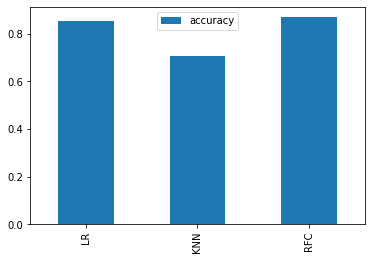

In [ ]:
model_compare = pd.DataFrame(m_score,index = ["accuracy"])
model_compare.T.plot.bar();

In [ ]:
LR_G = {"C":np.logspace(-4,4,20),
        "solver":["liblinear"]}

In [ ]:
np.random.seed(42)

rs_LR = RandomizedSearchCV(LogisticRegression(),
                           param_distributions=LR_G,
                           cv = 5,
                           n_iter=20,
                           verbose=True)

rs_LR.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_LR.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [ ]:
rs_LR.score(x_test,y_test)

0.8532608695652174

In [ ]:
GS_LR = GridSearchCV(LogisticRegression(),
                     param_grid=LR_G,
                     cv=5,
                    verbose=True)

GS_LR.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
GS_LR.score(x_test,y_test)

0.8532608695652174

In [ ]:
RF_G = {"n_estimators" : np.arange(10, 1000, 50),
           "max_depth" : [None, 3, 5, 10],
           "min_samples_split" : np.arange(2, 20, 2),
           "min_samples_leaf" : np.arange(1, 20, 2)}

In [ ]:
np.random.seed(42)

#RandomForest

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = RF_G,
                           cv = 5,
                           n_iter = 20,
                           verbose = True)

# Fit the model
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
rs_rf.best_params_

{'n_estimators': 610,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 5}

In [ ]:
rs_rf.score(x_test,y_test)

0.8858695652173914

In [ ]:
model =RandomForestClassifier()
model.fit(x_train.values,y_train)
val = np.array([[40,0,1,200,300,1,1,118,1,0,1]])
yn=model.predict(val)

In [ ]:
yn

array([0])